In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import glob
import json
from scipy.optimize import curve_fit

In [19]:
def get_base_counts(seq_file):
    def calc_base_counts(seq_array): 
        base_counts = []
        for pos in range(seq_array.shape[1]):
            counts = Counter(seq_array[:, pos])
            temp = []
            for base in ['A', 'T', 'G', 'C']:
                temp.append(counts[base])
            base_counts.append(temp)
        base_counts = np.array(base_counts)
        return base_counts/seq_array.shape[0]

    all_seq = []
    g_only_seq = []
    with open(seq_file) as h:
        for l in h:
            seq = list(next(h).rstrip('\n').upper())
            all_seq.append(seq[30:71])
            if seq[50] == 'C':
                g_only_seq.append(seq[30:71])
    all_seq = np.array(all_seq)
    g_only_seq = np.array(g_only_seq)
    base_counts_all = calc_base_counts(all_seq)
    base_counts_g_only = calc_base_counts(g_only_seq)
    return (
        (all_seq.shape[0], base_counts_all),
        (g_only_seq.shape[0], base_counts_g_only),
    )
    
base_dir = './data/oq_switchpoints'
samples =  ['Na_K_1', 'Na_K_2', 'Na_PDS_1', 'Na_PDS_2']

base_counts_all = {}
num_reads_all = {}
base_counts_g_only = {}
num_reads_g_only = {}

for sample in samples:
    print (sample)
    res = get_base_counts("%s/%s_slopped_50.fasta" % (
            base_dir, sample))
    base_counts_all[sample] = res[0][1]
    num_reads_all[sample] = res[0][0]
    base_counts_g_only[sample] = res[1][1]
    num_reads_g_only[sample] = res[1][0]

Na_K_1
Na_K_2
Na_PDS_1
Na_PDS_2


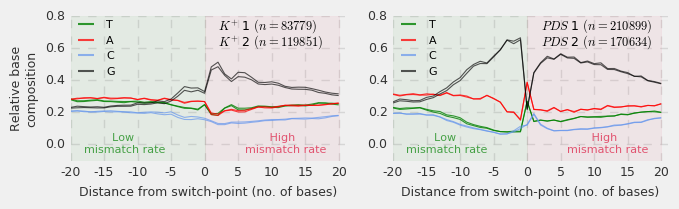

In [20]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1, 2, figsize=(7,2.3))
colors = ['green', 'red', 'cornflowerblue', 'black']
bases = ['T', 'A', 'C', 'G']
alphas = [0.65, 0.7, 0.75, 0.8][::-1]
for pos, sample in zip([0, 1], ['K', 'PDS']):
    axis = ax[pos]
    for i in range(4):
        axis.plot(base_counts_all['Na_%s_1' % sample][:, i], color=colors[i],
                lw=0.8, alpha=alphas[i], label=bases[i])
        axis.plot(base_counts_all['Na_%s_2' % sample][:, i], color=colors[i],
                lw=0.8, alpha=alphas[i])
    axis.set_xlabel('Distance from switch-point (no. of bases)', fontsize=9, color='k', alpha=0.8)
    axis.set_xticks(list(range(0,41,5)))
    axis.set_xticklabels(list(range(-20,21,5)), fontsize=9, color='k', alpha=0.8)
    axis.set_yticks(np.linspace(0,0.80,5))
    axis.set_yticklabels(np.linspace(0,0.80,5), fontsize=9, color='k', alpha=0.8)
    axis.set_ylim((-0.1,0.8))
    axis.set_xlim((0,41))
    leg = axis.legend(frameon=False, loc=(0, 0.55), fontsize=8, ncol=1)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(1.5)
    axis.grid(which='major', linestyle='--', alpha=0.7)
    axis.text(2, -0.05, '        Low\nmismatch rate',
              fontsize=8, color='green', alpha=0.7)
    axis.text(26, -0.05, '       High\nmismatch rate',
              fontsize=8, color='crimson', alpha=0.7)
    axis.axvspan(0, 20, alpha=0.05, color='green')
    axis.axvspan(20, 40, alpha=0.05, color='crimson')
    for i in ['top', 'bottom', 'left', 'right']:
        axis.spines[i].set_visible(False)

ax[0].set_ylabel('Relative base\ncomposition', fontsize=9, color='k', alpha=0.8)

ax[0].text(22, 0.72, r'$K^{+}$ 1 $(n=%d)$' % num_reads_all['Na_K_1'] , fontsize=9)
ax[0].text(22, 0.62, r'$K^{+}$ 2 $(n=%d)$' % num_reads_all['Na_K_2'] , fontsize=9)
ax[1].text(22, 0.72, r'$PDS$ 1 $(n=%d)$' % num_reads_all['Na_PDS_1'] , fontsize=9)
ax[1].text(22, 0.62, r'$PDS$ 2 $(n=%d)$' % num_reads_all['Na_PDS_2'] , fontsize=9)

fig.tight_layout()
plt.savefig('BasecompGSS_20.pdf', transparent=True, edgecolor='none')
plt.savefig('BasecompGSS_20.png', dpi=300, transparent=True, edgecolor='none')
plt.show()

In [21]:
pds_average = (base_counts_all['Na_PDS_1'] + base_counts_all['Na_PDS_2'])/2
pds_average[19], pds_average[20], pds_average[21]

(array([ 0.08045167,  0.15376517,  0.10628816,  0.65949501]),
 array([ 0.26951894,  0.38771673,  0.12306641,  0.21969792]),
 array([ 0.14375903,  0.21864807,  0.19039757,  0.44719533]))

In [22]:
k_average = (base_counts_all['Na_K_1'] + base_counts_all['Na_K_2'])/2
k_average[19], k_average[20], k_average[21]

(array([ 0.21802404,  0.27033268,  0.16597533,  0.34566794]),
 array([ 0.24845622,  0.26773072,  0.15901906,  0.324794  ]),
 array([ 0.18877233,  0.19160038,  0.1452586 ,  0.47436869]))

In [23]:
print ((k_average[21:31, 3]/k_average[10:20, 3]).mean())
print ((pds_average[21:31, 3]/pds_average[10:20, 3]).mean())

1.49183841833
0.973002734606


In [24]:
print((pds_average[10:20, 1]/pds_average[10:20, 0]).mean())
print((k_average[10:20, 1]/k_average[10:20, 0]).mean())

2.55896531794
1.12106645462


In [25]:
k_average[20, 3], pds_average[20, 3]

(0.32479400108976969, 0.21969792116635078)

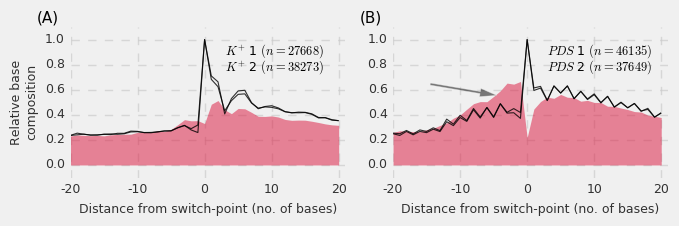

In [26]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1, 2, figsize=(7,2.3))
alphas = [0.65, 0.7, 0.75, 0.8][::-1]
for pos, sample in zip([0, 1], ['K', 'PDS']):
    axis = ax[pos]
    i = 3
    axis.plot(base_counts_g_only['Na_%s_1' % sample][:, i], color='k',
            lw=0.8, alpha=0.8)
    axis.plot(base_counts_g_only['Na_%s_2' % sample][:, i], color='k',
            lw=0.8, alpha=0.8)
    axis.fill_between(range(41), base_counts_all['Na_%s_1' % sample][:, i],
                      color='crimson', lw=0, alpha=0.5)
    axis.set_xlabel('Distance from switch-point (no. of bases)', fontsize=9, color='k', alpha=0.8)
    axis.set_xticks(list(range(0,41,10)))
    axis.set_xticklabels(list(range(-20,21,10)), fontsize=9, color='k', alpha=0.8)
    axis.set_yticks(np.linspace(0,1,6))
    axis.set_yticklabels(np.linspace(0,1,6), fontsize=9, color='k', alpha=0.8)
    axis.set_ylim((-0.1,1.1))
    axis.set_xlim((0,41))
    axis.grid(which='major', linestyle='--', alpha=0.7)
    for i in ['top', 'bottom', 'left', 'right']:
        axis.spines[i].set_visible(False)
ax[0].set_ylabel('Relative base\ncomposition', fontsize=9, color='k', alpha=0.8)

ax[0].text(23, 0.88, r'$K^{+}$ 1 $(n=%d)$' % num_reads_g_only['Na_K_1'] , fontsize=9)
ax[0].text(23, 0.75, r'$K^{+}$ 2 $(n=%d)$' % num_reads_g_only['Na_K_2'] , fontsize=9)
ax[0].annotate("", xy=(26, 0.56), xycoords='data', xytext=(26, 0.56), textcoords='data',
            arrowprops=dict(facecolor='k', shrink=0.05, width=1.5, headwidth=6, alpha=0.5),
            )

ax[1].text(23, 0.88, r'$PDS$ 1 $(n=%d)$' % num_reads_g_only['Na_PDS_1'] , fontsize=9)
ax[1].text(23, 0.75, r'$PDS$ 2 $(n=%d)$' % num_reads_g_only['Na_PDS_2'] , fontsize=9)
ax[1].annotate("", xy=(16, 0.55), xycoords='data', xytext=(5, 0.65), textcoords='data',
            arrowprops=dict(facecolor='k', shrink=0.05, width=1.5, headwidth=6, alpha=0.5),
            )

ax[0].text(-5, 1.14, '(A)', fontsize=11)
ax[1].text(-5, 1.14, '(B)', fontsize=11)

fig.tight_layout()
plt.savefig('BasecompGSS_startG.pdf', transparent=True, edgecolor='none')
plt.savefig('BasecompGSS_startG.png', dpi=300, transparent=True, edgecolor='none')
plt.show()

In [ ]:
for i in range(base_counts_all['Na_K_1'].shape[0]):
    print (i, np.array([float("%.2f" % x) for x in base_counts_all['Na_PDS_1'][i]]),
           np.array([float("%.2f" % x) for x in base_counts_all['Na_PDS_2'][i]]))

In [27]:
samples = {
    'Na_K_1': ['SRR1693705', 'SRR1693706'],
    'Na_K_2': ['SRR1693707', 'SRR1693708'],
    'Na_PDS_1': ['SRR1693709', 'SRR1693710'],
    'Na_PDS_2': ['SRR1693711', 'SRR1693712'],
}

for sample in samples:
    if sample != 'Na_PDS_2':
        continue
    sub_dirs = samples[sample]
    base_dir = './data/g4_seq/reanalysis/oq_validated_bed/' + sample
    d1, d2 = ["/".join([base_dir, x]) for x in sub_dirs]
    pre_q_files = glob.glob("%s/*pre_qual.npy" % d1) + \
                 glob.glob("%s/*pre_qual.npy" % d2)
    post_q_files = glob.glob("%s/*post_qual.npy" % d1) + \
                 glob.glob("%s/*post_qual.npy" % d2)
    pre_qs =[]
    for fn in tqdm(pre_q_files):
        pre_qs.extend(np.load(fn))
    post_qs = []
    for fn in tqdm(post_q_files):
        post_qs.extend(list(np.load(fn)))
    print (sample, flush=True)

100%|██████████| 342/342 [00:01<00:00, 256.44it/s]

Na_PDS_2


In [28]:
pre_qs = np.array(pre_qs)
post_qs = np.array([x if x > 0 else 42 for x in post_qs])
filters = pre_qs.T[1]
pre_qs = np.array([x if x > 0 else 42 for x in pre_qs.T[0]])
pre_qs.shape, post_qs.shape, filters.shape

((2587058,), (2587058,), (2587058,))

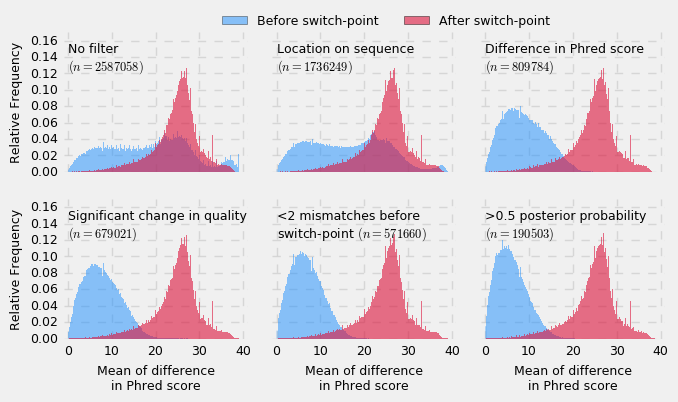

In [29]:
plt.style.use('fivethirtyeight')

fig, axis = plt.subplots(2, 3, figsize=(7, 4), sharex=True, sharey=True)
labels = [
    'No filter\n',
    'Location on sequence\n',
    'Difference in Phred score\n',
    'Significant change in quality\n',
    '<2 mismatches before\nswitch-point ',
    '>0.5 posterior probability\n',
]
for l,f,r,c in zip(labels, range(1,7), [0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]):
    ax = axis[r, c]
    pre_vals = pre_qs[filters >= f]
    pos_vals = post_qs[filters >= f]
    ax.hist(pre_vals, bins=200, edgecolor='none', color='dodgerblue', alpha=0.5,
            normed=True, label='Before switch-point')
    ax.hist(pos_vals, bins=200, edgecolor='none', color='crimson', alpha=0.6,
            normed=True, label='After switch-point')
    ax.xaxis.set_tick_params(labelsize=9)
    ax.yaxis.set_tick_params(labelsize=9)
    if r == 1:
        ax.set_xlabel('Mean of difference\nin Phred score', fontsize=9)
    if c == 0:
        ax.set_ylabel('Relative Frequency', fontsize=9)
    ax.set_xlim((-1, 41))
    ax.set_ylim((0, 0.17))
    ax.text(0, 0.155, l + r"$(n=%d)$" % len(pre_vals), fontsize=9, verticalalignment='top')
    ax.grid(which='major', linestyle='--', alpha=0.7)
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)
axis[0, 1].legend(loc=(-0.3, 1), fontsize=9, frameon=False, ncol=2)
fig.tight_layout()
plt.savefig('filter_switchpoint.pdf', transparent=True, edgecolor='none')
plt.savefig('filter_switchpoint.png', dpi=300, transparent=True, edgecolor='none')
plt.show()

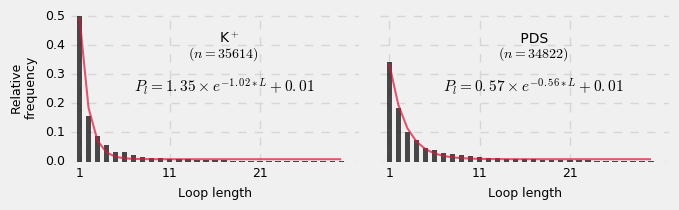

In [230]:
plt.style.use('fivethirtyeight')

loop_info = {}
for sample in ['Na_K_1', 'Na_K_2', 'Na_PDS_1', 'Na_PDS_2']:
    loop_info[sample] = []
    json_files = glob.glob("./data/QG_OQ_bulge_loop_min_lengths/%s/*" % sample)
    for jf in json_files:
        loop_info[sample].extend([x for x in json.load(open(jf))[1] if x is not None])
    
merged_info = {
    'K': np.array(loop_info['Na_K_1'] + loop_info['Na_K_2'] , dtype=int),
    'PDS' : np.array(loop_info['Na_PDS_1'] + loop_info['Na_PDS_2'] , dtype=int)
}

def clean_vals(a):
    valid_range = list(range(1, 31))
    counts = Counter(a)
    valid_counts = np.array([counts[i] for i in valid_range])
    return list(valid_counts/sum(valid_counts)), sum(valid_counts)

def get_fitted_curve(pos, vals):
    def expo_func(x, a, b, c):
        return a * np.exp(-b * x) + c

    popt, pcov = curve_fit(expo_func, pos, vals)
    a, b, c = popt
    fit_y = expo_func(pos, a, b, c)
    return list(fit_y), r'$P_l=%.2f \times e^{-%.2f*L} + %.2f $' % (a, b, c)

samples = ['K', 'PDS']
names = [r'   K$^+$', ' PDS']
fig, axis = plt.subplots(1, 2, figsize=(7, 2.3), sharex=True, sharey=True)
for s, r, n in zip(samples, [0, 1], names):
    ax = axis[r]
    vals, num_counts = clean_vals(merged_info[s])
    pos = np.array(range(1, len(vals)+1))
    ax.bar(pos-0.3, (vals), width=0.6, alpha=0.7, color='k', edgecolor='none', lw=0)
    fitted_curve, equation = get_fitted_curve(pos, vals)
    ax.plot(pos, np.array(fitted_curve), lw=1.5, color='crimson', alpha=0.7)
    ax.xaxis.set_tick_params(labelsize=9)
    ax.yaxis.set_tick_params(labelsize=9)
    ax.set_xticks(list(range(1, 31, 10)))
    ax.set_yticks([x/100 for x in range(0, 51, 10)])
    ax.set_xlim((0, 32))
    ax.set_ylim((0, 0.51))
    ax.set_xlabel('Loop length', fontsize=9)
    ax.text(15, 0.41, n, fontsize=10)
    ax.text(13, 0.36, r"$(n=%d)$" % num_counts, fontsize=10)
    ax.text(7, 0.24, equation, fontsize=11)
    ax.grid(which='major', linestyle='--', alpha=0.7)
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)
    
axis[0].set_ylabel('Relative\nfrequency', fontsize=9)
fig.tight_layout()
plt.savefig('loop_decay.pdf', transparent=True, edgecolor='none')
plt.savefig('loop_decay.png', dpi=300, transparent=True, edgecolor='none')
plt.show()

Counter({0: 36747, 1: 6629, 2: 2598, 3: 1311})
Counter({0: 37226, 1: 22412, 2: 11366, 3: 6818})


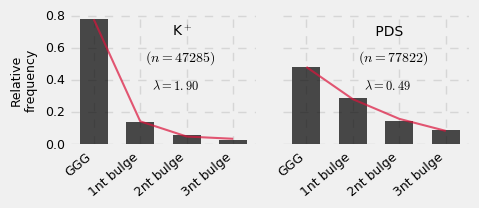

In [292]:
bulge_info = {}
for sample in ['Na_K_1', 'Na_K_2', 'Na_PDS_1', 'Na_PDS_2']:
    bulge_info[sample] = []
    json_files = glob.glob("./data/QG_OQ_bulge_loop_min_lengths/%s/*" % sample)
    for jf in json_files:
        bulge_info[sample].extend(json.load(open(jf))[0])
    
merged_bulge_info = {
    'K': np.array(bulge_info['Na_K_1'] + bulge_info['Na_K_2'] , dtype=int),
    'PDS' : np.array(bulge_info['Na_PDS_1'] + bulge_info['Na_PDS_2'] , dtype=int)
}

def clean_vals(a):
    valid_range = list(range(0, 4))
    counts = Counter(a)
    valid_counts = np.array([counts[i] for i in valid_range])
    return list(valid_counts/sum(valid_counts)), sum(valid_counts)

def get_fitted_curve(pos, vals):
    def expo_func(x, a, b, c):
        return a * np.exp(-b * x) + c

    popt, pcov = curve_fit(expo_func, pos, vals)
    a, b, c = popt
    fit_y = expo_func(pos, a, b, c)
    return list(fit_y), r'$\lambda=%.2f$' % b

samples = ['K', 'PDS']
names = [r'   K$^+$', ' PDS']
fig, axis = plt.subplots(1, 2, figsize=(5, 2.3), sharex=True, sharey=True)
for s, r, n in zip(samples, [0, 1], names):
    ax = axis[r]
    counts = Counter(merged_bulge_info[s])
    print (counts)
    num_counts = sum(counts.values())
    pos = np.array(range(0, 4))
    vals = np.array([counts[x] for x in pos])/num_counts
    ax.bar(pos-0.3, vals, width=0.6, alpha=0.7, color='k', edgecolor='none', lw=0)
    fitted_curve, equation = get_fitted_curve(pos, vals)
    ax.plot(pos, np.array(fitted_curve), lw=1.5, color='crimson', alpha=0.7)
    ax.xaxis.set_tick_params(labelsize=9)
    ax.yaxis.set_tick_params(labelsize=9)
    ax.set_xticks(list(range(0, 5)))
    ax.set_xticklabels(['GGG', '1nt bulge', '2nt bulge', '3nt bulge'],
                      rotation=40, ha='right')
    ax.set_yticks([x/100 for x in range(0, 81, 20)])
    ax.set_xlim((-0.5, 3.5))
    ax.set_ylim((0, 0.81))
    ax.text(1.4, 0.68, n, fontsize=10)
    ax.text(1.1, 0.52, r"$(n=%d)$" % num_counts, fontsize=10)
    ax.text(1.25, 0.34, equation, fontsize=9)
    ax.grid(which='major', linestyle='--', alpha=0.7)
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)

axis[0].set_ylabel('Relative\nfrequency', fontsize=9)
fig.tight_layout()
plt.savefig('bulge_decay.pdf', transparent=True, edgecolor='none')
plt.savefig('bulge_decay.png', dpi=300, transparent=True, edgecolor='none')
plt.show()

In [108]:
sequences = {0: [], 1:[]}
distances = {}
oq_pq_dir  = './data/g4_seq/reanalysis/oq_pq_distances/'
pq_configs = [(1, 3), (1, 7), (1, 15)]
configs = []
for c in pq_configs:
    config = "%d_%d" % (c[0], c[1])
    configs.append(config)
    distances[config]= {}
    for sample in ['Na_K_1', 'Na_K_2', 'Na_PDS_1', 'Na_PDS_2']:
        d = []
        fns = glob.glob("%s/%s/*/*_%d_%s.npy" % (oq_pq_dir, sample, c[0], c[1]))
        for fn in tqdm(fns, desc="%s %s" % (config, sample)):
            # -50 because switchpoint was +/-50 slopped
            # same as 'offset' in G4_Seq_PQS_analysis.py
            dists = [x-50 for x in np.load(fn)]
            d.extend(dists)
            seq_fn = fn.split('.npy')[0] + '.seq' 
            with open(seq_fn) as h:
                for l, dist in zip(h, dists):
                    if dist in [0,1]:
                        sequences[dist].append(l.rstrip('\n'))
        d = np.array(d)
        d = d[d < 21]
        d = d[d > -21]
        distances[config][sample] = Counter(list(d))

1_15 Na_PDS_2: 100%|██████████| 342/342 [00:03<00:00, 98.65it/s]


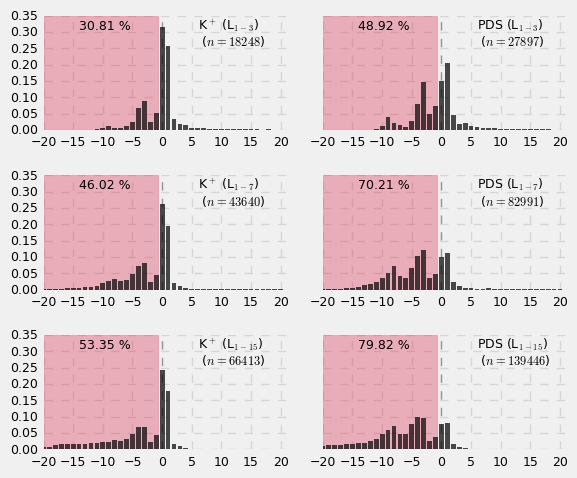

In [109]:
plt.style.use('fivethirtyeight')

fig, axis = plt.subplots(3, 2, figsize=(6, 5), sharey=True)
row = 0
col = 0
for config in configs:
    g4_sig = r'L$_{1-%s}$' % config.split('_')[1]
    dists = distances[config]
    pos = np.array(range(-20, 21))
    vals  = {
        'K': np.array([dists['Na_K_1'][i] + dists['Na_K_2'][i] for i in pos]),
        'PDS': np.array([dists['Na_PDS_1'][i] + dists['Na_PDS_2'][i] for i in pos])
    }
    for sample, name in zip(['K', 'PDS'], [r'K$^+$', 'PDS']):
        ax = axis[row, col]
        ax.axvline(0, lw=1, color='k', ls='--', alpha=0.3)
        ax.axvspan(-20, -0.7, color='crimson', alpha=0.3)
        ax.bar(pos-0.4, vals[sample]/sum(vals[sample]), width=0.8,
               alpha=0.7, color='k', edgecolor='none', lw=0)
        ax.text(6, 0.31, "%s (%s)" % (name,  g4_sig), fontsize=9)
        ax.text(6, 0.26, r' ($n=%d$)' % sum(vals[sample]), fontsize=9)
        pre_switch_vals = float(sum(vals[sample][:20])/sum(vals[sample])*100)
        ax.text(-14, 0.31, "%.2f %%" % pre_switch_vals, fontsize=9, color='k')
        ax.set_yticks(np.linspace(0, 0.35, 8))
        ax.set_xlim((-20,21))
        ax.set_ylim((0,0.35))
        ax.xaxis.set_tick_params(labelsize=9)
        ax.yaxis.set_tick_params(labelsize=9)
        ax.grid(which='major', linestyle='--', alpha=0.7)
        for i in ['top', 'bottom', 'left', 'right']:
            ax.spines[i].set_visible(False)
        col += 1
    row += 1
    col = 0
plt.tight_layout()
plt.savefig('pq_switchpoint.pdf', transparent=True, edgecolor='none')
plt.savefig('pq_switchpoint.png', dpi=300, transparent=True, edgecolor='none')
plt.show()

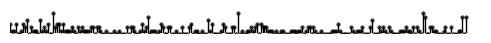

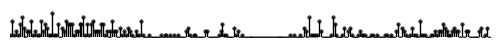

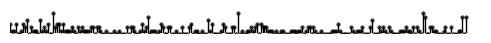

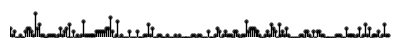

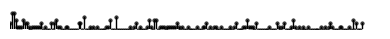

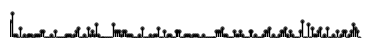

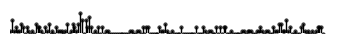

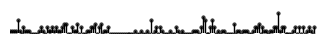

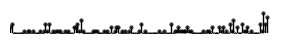

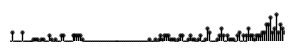

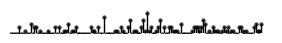

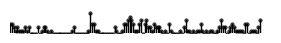

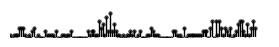

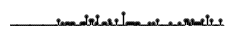

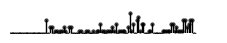

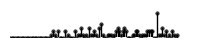

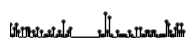

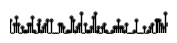

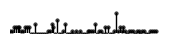

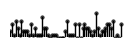

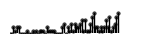

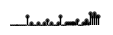

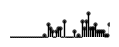

In [5]:
with open('/home/parashar/scratch/hg19_resource/hg19.genome') as h:
    for l in h:
        chrom, chrom_len = l.rstrip('\n').split('\t')
        chrom_len = int(chrom_len)
        ca = np.zeros(chrom_len)
        with open ('./data/oq_switchpoints/Na_K_1.bed') as h:
            for l in h:
                c = l.split('\t')
                if c[0] == chrom:
                    ca[int(c[1])]+=1
        x = [i for i in range(int(chrom_len//1e6))]
        counts = Counter([int(i//1e6) for i in np.where(ca>1)[0]])
        y = [counts[i] for i in x]
        fig, ax = plt.subplots(1, 1, figsize=(chrom_len/4e7, max(y)/20))
        markerline, stemlines, baseline = ax.stem(x, y, alpha=0.6)
        plt.setp(markerline, 'markerfacecolor', 'k', 'markersize', 2.5, 'alpha', 0.7)
        plt.setp(stemlines, 'color', 'k', 'linewidth', 1)
        plt.setp(baseline, 'color', 'r', 'linewidth', 0)
        ax.set_ylim((0.4, max(y)+1))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.yaxis.set_tick_params(labelsize=6)
        for i in ['top', 'bottom', 'left', 'right']:
            ax.spines[i].set_visible(False)
#         plt.savefig('recurrent_switch_points_%s.png' % chrom, dpi=300,
#                     transparent=True, edgecolor='none')
        plt.show()